## Uploading and exploring the dataset

In [53]:
#pip install pvanalytics
#pip install pvlib

In [54]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go
from pvanalytics import quality
from pvlib import temperature

In [55]:
#Downloading the dataset
file_path = '../module_temperature_dataset'

# Read data from pkl-file:
file = open(file_path , 'rb')
data_dict = pickle.load(file)
file.close()


In [56]:
data_dict

{'module_temperature_df':                      PT JKM325 nr 1 [°C]  PT JKM325 nr 2 [°C]  \
 Timestamp                                                       
 2021-01-01 00:00:00                 0.06                 0.07   
 2021-01-01 00:05:00                 0.06                 0.07   
 2021-01-01 00:10:00                 0.06                 0.07   
 2021-01-01 00:15:00                 0.06                 0.07   
 2021-01-01 00:20:00                 0.05                 0.06   
 ...                                  ...                  ...   
 2024-08-12 23:35:00                11.28                11.17   
 2024-08-12 23:40:00                10.84                10.85   
 2024-08-12 23:45:00                10.69                10.66   
 2024-08-12 23:50:00                10.56                10.56   
 2024-08-12 23:55:00                10.45                10.41   
 
                      PT JKM325 nr 3 [°C]  PT JKM335 nr 1 [°C]  \
 Timestamp                                       

In [57]:
#Extracting the different dataframes from the dictionary
module_temperature_df = data_dict['module_temperature_df']
irradiance_df = data_dict['irradiance_df']
weather_data_df = data_dict['weather_data_df']

In [58]:

module_temperature_df = module_temperature_df.dropna(how='all')
module_temperature_df = module_temperature_df.sort_values(by='Timestamp')

In [59]:
module_temperature_df

,PT JKM325 nr 1 [°C],PT JKM325 nr 2 [°C],PT JKM325 nr 3 [°C],PT JKM335 nr 1 [°C],PT JKM335 nr 2 [°C],PT JKM335 nr 3 [°C],PT REC nr 1 [°C],PT REC nr 2 [°C],PT REC nr 3 [°C],PT SunP nr 1 [°C],PT SunP nr 2 [°C],PT SunP nr 3 [°C],PT Talesun 1 [°C],PT Talesun 2 [°C],PT Talesun 3 [°C],PT Talesun FrLess 1 [°C],PT Talesun FrLess 2 [°C],PT Talesun FrLess 3 [°C]
Timestamp,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0.06,0.07,-2.53,0.06,0.07,-2.53,-1.50,-1.22,-1.01,-0.70,-0.60,-1.28,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:05:00,0.06,0.07,-2.53,0.06,0.07,-2.53,-1.51,-1.23,-1.02,-0.71,-0.61,-1.28,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:10:00,0.06,0.07,-2.54,0.06,0.07,-2.54,-1.52,-1.23,-1.03,-0.73,-0.62,-1.30,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:15:00,0.06,0.07,-2.54,0.06,0.07,-2.54,-1.52,-1.24,-1.03,-0.74,-0.63,-1.31,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:20:00,0.05,0.06,-2.55,0.05,0.06,-2.55,-1.53,-1.25,-1.04,-0.74,-0.64,-1.31,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12 23:35:00,11.28,11.17,8.77,8.57,8.43,8.37,9.71,9.93,10.05,11.57,11.74,10.08,11.76,11.04,11.27,12.69,12.21,12.00
2024-08-12 23:40:00,10.84,10.85,8.53,8.15,8.08,8.08,9.36,9.60,9.80,11.18,11.47,9.74,11.50,10.74,11.00,12.45,11.87,11.73
2024-08-12 23:45:00,10.69,10.66,8.37,7.94,7.86,7.89,9.19,9.43,9.61,10.96,11.25,9.51,11.25,10.49,10.76,12.27,11.67,11.53


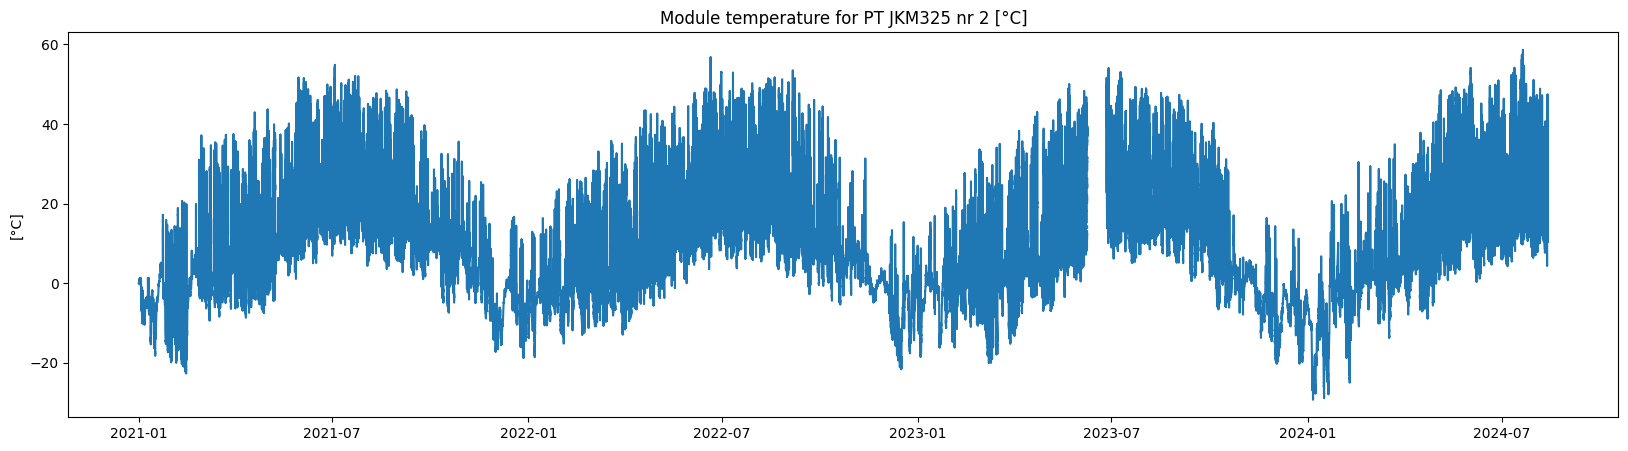

In [60]:
'''print(module_temperature_df.columns)
print(module_temperature_df.index)
print(len(module_temperature_df["PT JKM325 nr 2 [°C]"]))
'''
plt.figure(figsize=(20,5))
plt.plot(module_temperature_df["PT JKM325 nr 2 [°C]"])
plt.title("Module temperature for PT JKM325 nr 2 [°C]")
plt.ylabel("[°C]")
plt.show()

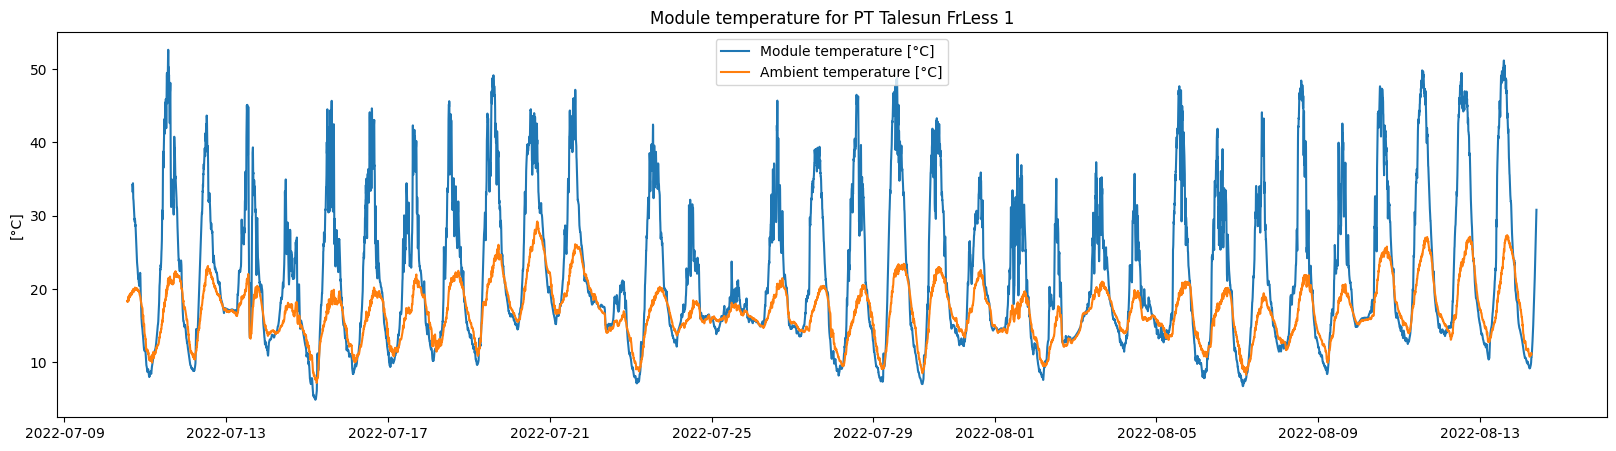

In [61]:
def plot_features(panel_id, index_start, index_end):
    plt.figure(figsize=(20,5))
    plt.plot(module_temperature_df[panel_id+" [°C]"][index_start:index_end], label="Module temperature [°C]")
    #plt.plot(module_temperature_df["PT Talesun FrLess 1 [°C]"][index_start:index_end], label="Module temperature bifacial [°C]")
    #plt.plot(irradiance_df["Irradiance (IRR Hor - SunP) [W/m²]"][index_start:index_end], label="Irradiance")
    plt.plot(weather_data_df["WS500_1_Temperature [°C]"][index_start:index_end], label="Ambient temperature [°C]")
    plt.title("Module temperature for "+panel_id)
    plt.ylabel("[°C]")
    plt.legend()
    plt.show()

plot_features('PT Talesun FrLess 1', 160000, 170000)
#plot_features('PT JKM335 nr 2', 160000, 162000)

In [62]:
MIN_DATE = pd.to_datetime('2021-01-01 00:00:00+00:00')
MAX_DATE = pd.to_datetime('2024-08-12 23:55:00+00:00')


#Making sure the dataset is timezone-aware
irradiance_df = irradiance_df.tz_localize('CET', ambiguous=False, nonexistent='NaT')
module_temperature_df = module_temperature_df.tz_localize('CET', ambiguous=False, nonexistent='NaT')
weather_data_df = weather_data_df.tz_localize('CET', ambiguous=False, nonexistent='NaT')

irradiance_df = irradiance_df.loc[irradiance_df.index.dropna()]
module_temperature_df = module_temperature_df.loc[module_temperature_df.index.dropna()]
weather_data_df = weather_data_df.loc[weather_data_df.index.dropna()]


irradiance_df = irradiance_df.tz_convert('UTC').asfreq('5 min').loc[MIN_DATE:MAX_DATE]
module_temperature_df = module_temperature_df.tz_convert('UTC').asfreq('5 min').loc[MIN_DATE:MAX_DATE]
weather_data_df = weather_data_df.tz_convert('UTC').asfreq('5 min').loc[MIN_DATE:MAX_DATE]
'''
print(irradiance_df.index)

'''
'''irradiance_df = irradiance_df.tz_localize("UTC")
module_temperature_df = module_temperature_df.tz_localize("UTC")
weather_data_df = weather_data_df.tz_localize("UTC")'''

'irradiance_df = irradiance_df.tz_localize("UTC")\nmodule_temperature_df = module_temperature_df.tz_localize("UTC")\nweather_data_df = weather_data_df.tz_localize("UTC")'

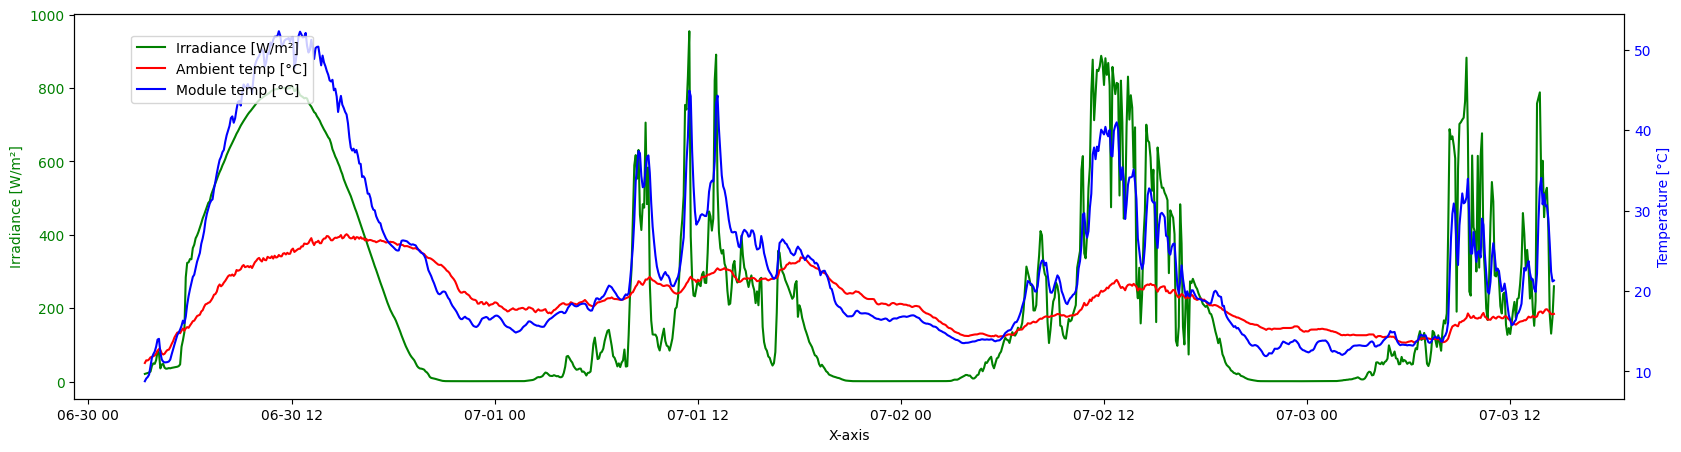

In [63]:
fra=157000
til=158000

fig, ax1 = plt.subplots(figsize=(20,5))

# Plot the first feature with its own y-axis
ax1.plot(irradiance_df["Irradiance (IRR Hor - SunP) [W/m²]"][fra:til], label="Irradiance [W/m²]", color="g")
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Irradiance [W/m²]', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(weather_data_df["WS500_1_Temperature [°C]"][fra:til], label="Ambient temp [°C]", color="r")
ax2.set_ylabel('Temperature [°C]', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Plot the third feature on the same secondary y-axis
ax2.plot(module_temperature_df["PT JKM335 nr 1 [°C]"][fra:til], label="Module temp [°C]", color="b")

# Add a legend to differentiate the features
fig.legend(loc="upper left", bbox_to_anchor=(0.15,0.85))

plt.show()


In [64]:
print(len(module_temperature_df))
print(len(irradiance_df))
print(len(weather_data_df))

380136
380136
380136


In [65]:
merged_df = pd.merge(module_temperature_df, irradiance_df, left_index=True, right_index=True, how='outer')
merged_df = pd.merge(merged_df, weather_data_df, left_index=True, right_index=True, how='outer')

In [66]:
merged_df.to_csv("merged_df.csv")

In [15]:
merged_df.columns

Index(['PT JKM325 nr 1 [°C]', 'PT JKM325 nr 2 [°C]', 'PT JKM325 nr 3 [°C]',
       'PT JKM335 nr 1 [°C]', 'PT JKM335 nr 2 [°C]', 'PT JKM335 nr 3 [°C]',
       'PT REC nr 1 [°C]', 'PT REC nr 2 [°C]', 'PT REC nr 3 [°C]',
       'PT SunP nr 1 [°C]', 'PT SunP nr 2 [°C]', 'PT SunP nr 3 [°C]',
       'PT Talesun 1 [°C]', 'PT Talesun 2 [°C]', 'PT Talesun 3 [°C]',
       'PT Talesun FrLess 1 [°C]', 'PT Talesun FrLess 2 [°C]',
       'PT Talesun FrLess 3 [°C]', 'Irradiance (IRR Hor - SunP) [W/m²]',
       'Irradiance (IRR Plan - SunP) [W/m²]',
       'Irradiance (IRR Plan - Talesun) [W/m²]',
       'Irradiance (IRR Plan - JKM325) [W/m²]',
       'Irradiance (IRR Plan - JKM335) [W/m²]',
       'Irradiance (SMP10 Sunpower plan) [W/m²]',
       'Irradiance (SMP10 Sunpower horisontal) [W/m²]',
       'Irradiance (SMP10 Talesun albedo) [W/m²]',
       'Irradiance (SMP10 Talesun plan) [W/m²]',
       'Irradiance (KippZonen SMP10 20201023) [W/m²]',
       'WS500_1_Air pressure abs [hPa]', 'WS500_1_Air

In [16]:
merged_df['Irradiance (IRR Plan - SunP) [W/m²]']

Timestamp
2021-01-01 00:00:00+00:00    1.30
2021-01-01 00:05:00+00:00    1.30
2021-01-01 00:10:00+00:00    1.31
2021-01-01 00:15:00+00:00    1.31
2021-01-01 00:20:00+00:00    1.30
                             ... 
2024-08-12 23:35:00+00:00    2.23
2024-08-12 23:40:00+00:00    2.18
2024-08-12 23:45:00+00:00    2.15
2024-08-12 23:50:00+00:00    2.11
2024-08-12 23:55:00+00:00    2.18
Name: Irradiance (IRR Plan - SunP) [W/m²], Length: 380160, dtype: float64

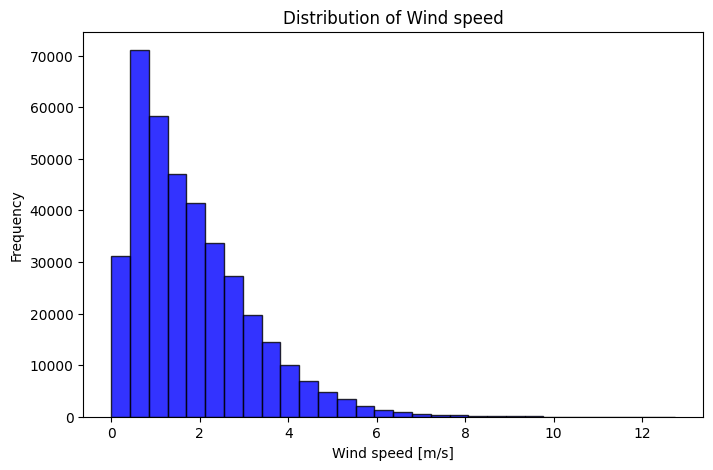

1.8229402506092123


In [23]:
plt.figure(figsize=(8, 5))
plt.hist(merged_df["WS500_1_Wind speed [m/s]"], bins=30, alpha=0.8, color='blue', edgecolor='black')
plt.title('Distribution of Wind speed')
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Frequency')
plt.show()
print(np.mean(merged_df["WS500_1_Wind speed [m/s]"]))

## Quality checks using PVAnalytics

-Gjøre alle kvalitetssjekker, slette punkter som blir plukket ut. Så gjøre gjennomsnittsgreia, hvor man kun tar med timer med over et visst antall målinger av alle relevante verdier. 

In [15]:
#quality_irradiance = quality.irradiance(irradiance_df["Irradiance (IRR Hor - SunP) [W/m²]"])

In [16]:
def stale_values_to_nan(df):
    mask = pd.DataFrame()
    for columnname in df.columns:
        quality_gaps = quality.gaps.stale_values_diff(df[columnname])
        mask[columnname] = quality_gaps
    df = df.mask(mask==1, np.nan)
    return df

df_clean = stale_values_to_nan(merged_df.copy())

c:\Users\tonea\AppData\Local\Programs\Python\Python310\lib\site-packages\pvanalytics\quality\gaps.py:126: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [17]:
def outliers_to_nan(df):
    mask = pd.DataFrame()
    for columnname in df.columns:
        outliers = quality.outliers.tukey(df[columnname], k=1.5) #returns 1 for outliers, 0 for other points
        mask[columnname] = outliers
    df = df.mask(mask==1, np.nan) 
    return df

df_outliers_removed = outliers_to_nan(df_clean.copy())

In [18]:

def  weather_limits_to_nan(df):
    mask = pd.DataFrame()
    mod_temp_cols = ['PT JKM325 nr 1 [°C]', 'PT JKM325 nr 2 [°C]', 'PT JKM325 nr 3 [°C]',
       'PT JKM335 nr 1 [°C]', 'PT JKM335 nr 2 [°C]', 'PT JKM335 nr 3 [°C]',
       'PT REC nr 1 [°C]', 'PT REC nr 2 [°C]', 'PT REC nr 3 [°C]',
       'PT SunP nr 1 [°C]', 'PT SunP nr 2 [°C]', 'PT SunP nr 3 [°C]',
       'PT Talesun 1 [°C]', 'PT Talesun 2 [°C]', 'PT Talesun 3 [°C]',
       'PT Talesun FrLess 1 [°C]', 'PT Talesun FrLess 2 [°C]',
       'PT Talesun FrLess 3 [°C]']

    rel_hum = quality.weather.relative_humidity_limits(df['WS500_1_Humidity rel [%]']) #Returns 1 if the value is within the bounds, i.e. points with 0 should be removed. 
    mask['WS500_1_Humidity rel [%]'] = rel_hum

    #Siste 13 måneder i Kjeller: temp har variert fra -32 til 27,4 grader. https://www.yr.no/nb/historikk/tabell/5-4200/Norge/Akershus/Lillestr%C3%B8m/Kjeller?q=siste-13-m%C3%A5neder
    temp = quality.weather.temperature_limits(df['WS500_1_Temperature [°C]'], limits=(- 35.0, 40.0)) #Returns 1 if the value is within the bounds, i.e. points with 0 should be removed. 
    mask['WS500_1_Temperature [°C]'] = temp

    wind = quality.weather.wind_limits(df['WS500_1_Wind speed [m/s]'], limits=(0.0, 30.0)) #basert på vindstyrke på yr, true if it is within the bounds
    mask['WS500_1_Wind speed [m/s]'] = wind
    
    #Sets a lot of measurements to nan even with quite a low correlation_min-value
    irr_plans_names = ["SunP", "Talesun", "JKM325", "JKM335", "PT REC"]
    irr_plans=['Irradiance (IRR Plan - SunP) [W/m²]', 'Irradiance (IRR Plan - Talesun) [W/m²]', 'Irradiance (IRR Plan - JKM325) [W/m²]', 'Irradiance (IRR Plan - JKM335) [W/m²]', 'Irradiance (IRR Plan - SunP) [W/m²]']

    for col in mod_temp_cols:
        for i in range(len(irr_plans_names)):
            if (irr_plans_names[i] in col):
                mod_temp = quality.weather.module_temperature_check(df[col], df[irr_plans[i]], correlation_min=0.1) #True if the temp and irradiance correlates more than correlation_min. 
                print(mod_temp)
                #mask[col] = mod_temp #Markert ut så ikke alle modultemperaturer skal settes til nan. 

    for col in df.columns:
        if col not in mask.columns:
            mask[col]=np.ones(len(mask['WS500_1_Humidity rel [%]']))
    df = df.mask(mask==0, np.nan)
    return df

df_finished = weather_limits_to_nan(df_outliers_removed.copy())


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [19]:
df_finished

,PT JKM325 nr 1 [°C],PT JKM325 nr 2 [°C],PT JKM325 nr 3 [°C],PT JKM335 nr 1 [°C],PT JKM335 nr 2 [°C],PT JKM335 nr 3 [°C],PT REC nr 1 [°C],PT REC nr 2 [°C],PT REC nr 3 [°C],PT SunP nr 1 [°C],...,Irradiance (SMP10 Talesun albedo) [W/m²],Irradiance (SMP10 Talesun plan) [W/m²],Irradiance (KippZonen SMP10 20201023) [W/m²],WS500_1_Air pressure abs [hPa],WS500_1_Air pressure rel [hPa],WS500_1_Humidity abs [g/m³],WS500_1_Humidity rel [%],WS500_1_Temperature [°C],WS500_1_Wind direction [°],WS500_1_Wind speed [m/s]
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00+00:00,0.06,0.07,-2.53,0.06,0.07,-2.53,-1.50,-1.22,-1.01,-0.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:05:00+00:00,0.06,0.07,-2.53,0.06,0.07,-2.53,-1.51,-1.23,-1.02,-0.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:10:00+00:00,0.06,0.07,-2.54,0.06,0.07,-2.54,-1.52,-1.23,-1.03,-0.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:15:00+00:00,0.06,0.07,-2.54,0.06,0.07,-2.54,-1.52,-1.24,-1.03,-0.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:20:00+00:00,0.05,0.06,-2.55,0.05,0.06,-2.55,-1.53,-1.25,-1.04,-0.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12 23:35:00+00:00,11.28,11.17,8.77,8.57,8.43,8.37,9.71,9.93,10.05,11.57,...,NaN,NaN,NaN,1001.22,1000.72,8.40,65.47,15.04,185.26,0.49
2024-08-12 23:40:00+00:00,10.84,10.85,8.53,8.15,8.08,8.08,9.36,9.60,9.80,11.18,...,NaN,NaN,NaN,1001.18,1000.68,8.44,66.36,14.92,158.36,0.46
2024-08-12 23:45:00+00:00,10.69,10.66,8.37,7.94,7.86,7.89,9.19,9.43,9.61,10.96,...,NaN,NaN,NaN,1001.23,1000.73,8.49,66.74,14.88,245.06,0.52


In [20]:
import plotly.graph_objs as go
import plotly.express as px


def plot_feature_after_processing(df_before, df_after, feature, a, b):
    # Create traces for the filtered out points and remaining points
    trace1 = go.Scatter(
        x=df_before.index[a:b],
        y=df_before[feature][a:b],
        mode='markers',
        marker=dict(color='blue', opacity=0.2),
        name='Filtered out'
    )

    trace2 = go.Scatter(
        x=df_after.index[a:b],
        y=df_after[feature][a:b],
        mode='markers',
        marker=dict(color='blue'),
        name='Remaining points'
    )

    # Define layout
    layout = go.Layout(
        title=feature + " after filtering out anomalies",
        xaxis_title='Index',
        yaxis_title=feature,
        width=900,
        height=500
    )

    # Create the figure with the two traces
    fig = go.Figure(data=[trace1, trace2], layout=layout)

    # Show the interactive plot
    fig.show()

In [21]:
df_finished.columns

Index(['PT JKM325 nr 1 [°C]', 'PT JKM325 nr 2 [°C]', 'PT JKM325 nr 3 [°C]',
       'PT JKM335 nr 1 [°C]', 'PT JKM335 nr 2 [°C]', 'PT JKM335 nr 3 [°C]',
       'PT REC nr 1 [°C]', 'PT REC nr 2 [°C]', 'PT REC nr 3 [°C]',
       'PT SunP nr 1 [°C]', 'PT SunP nr 2 [°C]', 'PT SunP nr 3 [°C]',
       'PT Talesun 1 [°C]', 'PT Talesun 2 [°C]', 'PT Talesun 3 [°C]',
       'PT Talesun FrLess 1 [°C]', 'PT Talesun FrLess 2 [°C]',
       'PT Talesun FrLess 3 [°C]', 'Irradiance (IRR Hor - SunP) [W/m²]',
       'Irradiance (IRR Plan - SunP) [W/m²]',
       'Irradiance (IRR Plan - Talesun) [W/m²]',
       'Irradiance (IRR Plan - JKM325) [W/m²]',
       'Irradiance (IRR Plan - JKM335) [W/m²]',
       'Irradiance (SMP10 Sunpower plan) [W/m²]',
       'Irradiance (SMP10 Sunpower horisontal) [W/m²]',
       'Irradiance (SMP10 Talesun albedo) [W/m²]',
       'Irradiance (SMP10 Talesun plan) [W/m²]',
       'Irradiance (KippZonen SMP10 20201023) [W/m²]',
       'WS500_1_Air pressure abs [hPa]', 'WS500_1_Air

In [1]:
#plot_feature_after_processing(merged_df, df_finished, 'PT Talesun 2 [°C]', 120000, 175000)
#plot_feature_after_processing(merged_df, df_finished, "Irradiance (IRR Hor - SunP) [W/m²]", 80000, 85000)
#plot_feature_after_processing(merged_df, df_finished, 'PT REC nr 3 [°C]', 60000, 65000)
#plot_feature_after_processing(merged_df, df_finished, 'WS500_1_Temperature [°C]', 120000, 175000)
#plot_feature_after_processing(merged_df, df_finished, 'WS500_1_Wind speed [m/s]', 80000, 85000)
#plot_feature_after_processing(merged_df, df_finished, 'PT JKM335 nr 3 [°C]', 60000, 65000)

In [23]:
df_finished

,PT JKM325 nr 1 [°C],PT JKM325 nr 2 [°C],PT JKM325 nr 3 [°C],PT JKM335 nr 1 [°C],PT JKM335 nr 2 [°C],PT JKM335 nr 3 [°C],PT REC nr 1 [°C],PT REC nr 2 [°C],PT REC nr 3 [°C],PT SunP nr 1 [°C],...,Irradiance (SMP10 Talesun albedo) [W/m²],Irradiance (SMP10 Talesun plan) [W/m²],Irradiance (KippZonen SMP10 20201023) [W/m²],WS500_1_Air pressure abs [hPa],WS500_1_Air pressure rel [hPa],WS500_1_Humidity abs [g/m³],WS500_1_Humidity rel [%],WS500_1_Temperature [°C],WS500_1_Wind direction [°],WS500_1_Wind speed [m/s]
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00+00:00,0.06,0.07,-2.53,0.06,0.07,-2.53,-1.50,-1.22,-1.01,-0.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:05:00+00:00,0.06,0.07,-2.53,0.06,0.07,-2.53,-1.51,-1.23,-1.02,-0.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:10:00+00:00,0.06,0.07,-2.54,0.06,0.07,-2.54,-1.52,-1.23,-1.03,-0.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:15:00+00:00,0.06,0.07,-2.54,0.06,0.07,-2.54,-1.52,-1.24,-1.03,-0.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 00:20:00+00:00,0.05,0.06,-2.55,0.05,0.06,-2.55,-1.53,-1.25,-1.04,-0.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12 23:35:00+00:00,11.28,11.17,8.77,8.57,8.43,8.37,9.71,9.93,10.05,11.57,...,NaN,NaN,NaN,1001.22,1000.72,8.40,65.47,15.04,185.26,0.49
2024-08-12 23:40:00+00:00,10.84,10.85,8.53,8.15,8.08,8.08,9.36,9.60,9.80,11.18,...,NaN,NaN,NaN,1001.18,1000.68,8.44,66.36,14.92,158.36,0.46
2024-08-12 23:45:00+00:00,10.69,10.66,8.37,7.94,7.86,7.89,9.19,9.43,9.61,10.96,...,NaN,NaN,NaN,1001.23,1000.73,8.49,66.74,14.88,245.06,0.52


In [24]:
#Columns we are using in out models, i.e. columns we want to have at least 8 measurement per hour for it to be included
column_list = ['PT JKM325 nr 1 [°C]', 'PT JKM325 nr 2 [°C]', 'PT JKM325 nr 3 [°C]',
       'PT JKM335 nr 1 [°C]', 'PT JKM335 nr 2 [°C]', 'PT JKM335 nr 3 [°C]',
       'PT REC nr 1 [°C]', 'PT REC nr 2 [°C]', 'PT REC nr 3 [°C]',
       'PT SunP nr 1 [°C]', 'PT SunP nr 2 [°C]', 'PT SunP nr 3 [°C]',
       'PT Talesun 1 [°C]', 'PT Talesun 2 [°C]', 'PT Talesun 3 [°C]',
       'PT Talesun FrLess 1 [°C]', 'PT Talesun FrLess 2 [°C]',
       'PT Talesun FrLess 3 [°C]', 'Irradiance (IRR Hor - SunP) [W/m²]',
       'Irradiance (IRR Plan - SunP) [W/m²]',
       'Irradiance (IRR Plan - Talesun) [W/m²]',
       'Irradiance (IRR Plan - JKM325) [W/m²]',
       'Irradiance (IRR Plan - JKM335) [W/m²]',
       'WS500_1_Temperature [°C]',
       'WS500_1_Wind speed [m/s]']


#Resampling and checking non-null counts
df_non_null_counts = df_finished.resample('h')[column_list].count()

#Filtering out hours where any of the column has less than 10 non-null rows
valid_hours = df_non_null_counts[df_non_null_counts >= 8].dropna()

#Using these valid hours to filter your original resampled df
df_hourly_avg = df_finished.resample('h').mean()

#Keepng only the valid hours in the final df
df_hourly_avg_filtered = df_hourly_avg.loc[valid_hours.index]


In [25]:
df_hourly_avg_filtered

,PT JKM325 nr 1 [°C],PT JKM325 nr 2 [°C],PT JKM325 nr 3 [°C],PT JKM335 nr 1 [°C],PT JKM335 nr 2 [°C],PT JKM335 nr 3 [°C],PT REC nr 1 [°C],PT REC nr 2 [°C],PT REC nr 3 [°C],PT SunP nr 1 [°C],...,Irradiance (SMP10 Talesun albedo) [W/m²],Irradiance (SMP10 Talesun plan) [W/m²],Irradiance (KippZonen SMP10 20201023) [W/m²],WS500_1_Air pressure abs [hPa],WS500_1_Air pressure rel [hPa],WS500_1_Humidity abs [g/m³],WS500_1_Humidity rel [%],WS500_1_Temperature [°C],WS500_1_Wind direction [°],WS500_1_Wind speed [m/s]
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-03-03 16:00:00+00:00,8.590833,8.785833,6.380000,8.590833,8.785833,6.380000,7.557500,7.977500,7.859167,8.286667,...,NaN,NaN,NaN,1002.936667,1002.436667,4.460000,82.579167,1.596667,191.633333,1.775833
2021-03-03 17:00:00+00:00,1.888333,1.929167,-0.885000,1.888333,1.929167,-0.885000,0.744167,1.030833,1.052500,1.528333,...,NaN,NaN,NaN,1002.223333,1001.723333,4.365000,86.360833,0.546667,191.410833,1.795833
2021-03-03 18:00:00+00:00,-1.303333,-1.360000,-3.855833,-1.303333,-1.360000,-3.855833,-2.788333,-2.546667,-2.190833,-1.960000,...,NaN,NaN,NaN,1002.106667,1001.606667,4.196667,91.858333,-0.874167,184.155833,1.600000
2021-03-03 19:00:00+00:00,-1.688333,-1.693333,-4.295000,-1.688333,-1.693333,-4.295000,-3.192500,-2.951667,-2.508333,-2.453333,...,NaN,NaN,NaN,1002.175833,1001.675833,4.110000,93.687500,-1.392500,175.453333,1.420000
2021-03-03 20:00:00+00:00,-0.342500,-0.297500,-2.721667,-0.342500,-0.297500,-2.721667,-1.824167,-1.557500,-1.310833,-1.088333,...,NaN,NaN,NaN,1002.415833,1001.915833,4.163333,95.575000,-1.446667,147.527500,0.799167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12 19:00:00+00:00,19.621667,19.764167,17.639167,16.685833,16.764167,16.922500,17.833333,18.133333,18.504167,19.445833,...,38.576667,78.886667,NaN,1000.157500,999.657500,7.326667,40.745000,20.730833,180.339167,0.927500
2024-08-12 20:00:00+00:00,17.195000,17.117500,14.668333,14.136667,13.927500,13.989167,15.908333,16.244167,16.157500,17.690000,...,34.410000,26.470000,NaN,1000.205833,999.705833,8.060000,47.107500,19.882500,144.799167,0.751667
2024-08-12 21:00:00+00:00,13.258333,13.238333,10.859167,10.663333,10.534167,10.565833,11.991667,12.225000,12.350833,13.950833,...,0.670000,-2.996667,NaN,1000.761667,1000.261667,8.447500,56.628333,17.557500,224.125833,1.052500


In [26]:
df_hourly_avg_filtered.to_csv("df_hourly")

Lagre i csv?? For å kunne bruke i de ulike filene?

In [27]:
df_hourly_avg_filtered

,PT JKM325 nr 1 [°C],PT JKM325 nr 2 [°C],PT JKM325 nr 3 [°C],PT JKM335 nr 1 [°C],PT JKM335 nr 2 [°C],PT JKM335 nr 3 [°C],PT REC nr 1 [°C],PT REC nr 2 [°C],PT REC nr 3 [°C],PT SunP nr 1 [°C],...,Irradiance (SMP10 Talesun albedo) [W/m²],Irradiance (SMP10 Talesun plan) [W/m²],Irradiance (KippZonen SMP10 20201023) [W/m²],WS500_1_Air pressure abs [hPa],WS500_1_Air pressure rel [hPa],WS500_1_Humidity abs [g/m³],WS500_1_Humidity rel [%],WS500_1_Temperature [°C],WS500_1_Wind direction [°],WS500_1_Wind speed [m/s]
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-03-03 16:00:00+00:00,8.590833,8.785833,6.380000,8.590833,8.785833,6.380000,7.557500,7.977500,7.859167,8.286667,...,NaN,NaN,NaN,1002.936667,1002.436667,4.460000,82.579167,1.596667,191.633333,1.775833
2021-03-03 17:00:00+00:00,1.888333,1.929167,-0.885000,1.888333,1.929167,-0.885000,0.744167,1.030833,1.052500,1.528333,...,NaN,NaN,NaN,1002.223333,1001.723333,4.365000,86.360833,0.546667,191.410833,1.795833
2021-03-03 18:00:00+00:00,-1.303333,-1.360000,-3.855833,-1.303333,-1.360000,-3.855833,-2.788333,-2.546667,-2.190833,-1.960000,...,NaN,NaN,NaN,1002.106667,1001.606667,4.196667,91.858333,-0.874167,184.155833,1.600000
2021-03-03 19:00:00+00:00,-1.688333,-1.693333,-4.295000,-1.688333,-1.693333,-4.295000,-3.192500,-2.951667,-2.508333,-2.453333,...,NaN,NaN,NaN,1002.175833,1001.675833,4.110000,93.687500,-1.392500,175.453333,1.420000
2021-03-03 20:00:00+00:00,-0.342500,-0.297500,-2.721667,-0.342500,-0.297500,-2.721667,-1.824167,-1.557500,-1.310833,-1.088333,...,NaN,NaN,NaN,1002.415833,1001.915833,4.163333,95.575000,-1.446667,147.527500,0.799167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12 19:00:00+00:00,19.621667,19.764167,17.639167,16.685833,16.764167,16.922500,17.833333,18.133333,18.504167,19.445833,...,38.576667,78.886667,NaN,1000.157500,999.657500,7.326667,40.745000,20.730833,180.339167,0.927500
2024-08-12 20:00:00+00:00,17.195000,17.117500,14.668333,14.136667,13.927500,13.989167,15.908333,16.244167,16.157500,17.690000,...,34.410000,26.470000,NaN,1000.205833,999.705833,8.060000,47.107500,19.882500,144.799167,0.751667
2024-08-12 21:00:00+00:00,13.258333,13.238333,10.859167,10.663333,10.534167,10.565833,11.991667,12.225000,12.350833,13.950833,...,0.670000,-2.996667,NaN,1000.761667,1000.261667,8.447500,56.628333,17.557500,224.125833,1.052500


## Applying hourly averages

In [28]:
#Merging all rows by the hour, and calculating the mean value
df_hourly_avg = merged_df.resample('h').mean()

In [29]:
df_hourly_avg

,PT JKM325 nr 1 [°C],PT JKM325 nr 2 [°C],PT JKM325 nr 3 [°C],PT JKM335 nr 1 [°C],PT JKM335 nr 2 [°C],PT JKM335 nr 3 [°C],PT REC nr 1 [°C],PT REC nr 2 [°C],PT REC nr 3 [°C],PT SunP nr 1 [°C],...,Irradiance (SMP10 Talesun albedo) [W/m²],Irradiance (SMP10 Talesun plan) [W/m²],Irradiance (KippZonen SMP10 20201023) [W/m²],WS500_1_Air pressure abs [hPa],WS500_1_Air pressure rel [hPa],WS500_1_Humidity abs [g/m³],WS500_1_Humidity rel [%],WS500_1_Temperature [°C],WS500_1_Wind direction [°],WS500_1_Wind speed [m/s]
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00+00:00,0.103333,0.110000,-2.514167,0.103333,0.110000,-2.514167,-1.452500,-1.171667,-0.975000,-0.662500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:00:00+00:00,0.210833,0.211667,-2.434167,0.210833,0.211667,-2.434167,-1.329167,-1.047500,-0.855833,-0.550833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:00:00+00:00,0.067500,0.076667,-2.554167,0.067500,0.076667,-2.554167,-1.494167,-1.207500,-1.020833,-0.730833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 03:00:00+00:00,0.067500,0.067500,-2.570833,0.067500,0.067500,-2.570833,-1.500000,-1.215833,-1.031667,-0.731667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 04:00:00+00:00,0.021667,0.026667,-2.605000,0.021667,0.026667,-2.605000,-1.537500,-1.256667,-1.070000,-0.766667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12 19:00:00+00:00,19.621667,19.764167,17.639167,16.685833,16.764167,16.922500,17.833333,18.133333,18.504167,19.445833,...,38.576667,78.886667,NaN,1000.157500,999.657500,7.326667,40.745000,20.730833,180.339167,0.927500
2024-08-12 20:00:00+00:00,17.195000,17.117500,14.668333,14.136667,13.927500,13.989167,15.908333,16.244167,16.157500,17.690000,...,34.410000,26.470000,NaN,1000.205833,999.705833,8.060000,47.107500,19.882500,144.799167,0.751667
2024-08-12 21:00:00+00:00,13.258333,13.238333,10.859167,10.663333,10.534167,10.565833,11.991667,12.225000,12.350833,13.950833,...,0.670000,-3.497500,NaN,1000.761667,1000.261667,8.447500,56.628333,17.557500,224.125833,1.052500


## Testing some pvlib-models

Calculates the back surface temperature per the Sandia Array Performance Model, where the module temperature is given by


$T_{m} = E \cdot exp(a+b \cdot WS) + T_a$

(Eq. 11 i artikkelen jeg har lagret som SAPM model)

Inputs to the model are plane-of-array irradiance $E$ (W/m2) and ambient air temperature $T_a$ (C). Model outputs are surface temperature at the back of the module $T_m$ and cell temperature $T_C$. Model parameters depend both on the module construction and its mounting.(See table)

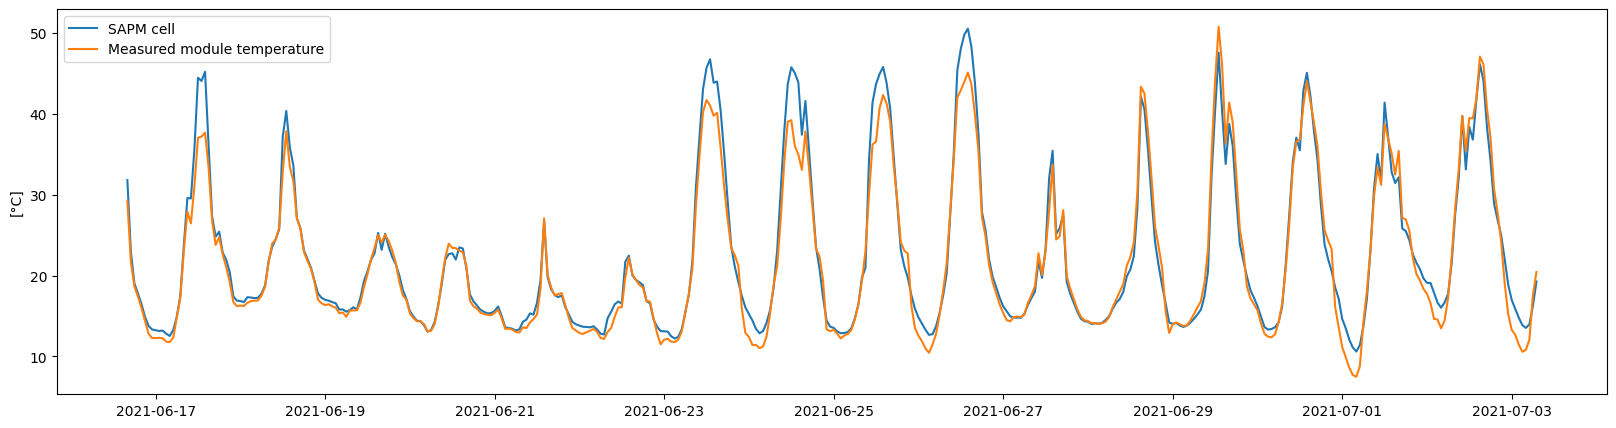

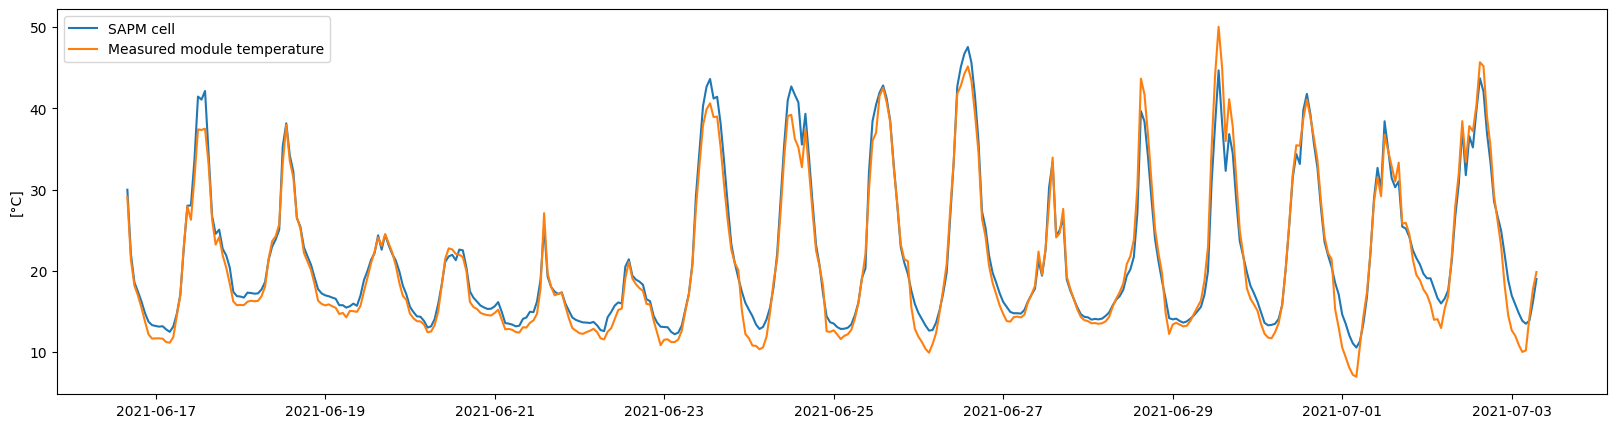

In [30]:
#Sandia Array Performance Model

#glass/glass: open rack   a=-3.47   b=-0.0594  
temp_sapm_cell = temperature.sapm_module(df_hourly_avg["Irradiance (IRR Plan - Talesun) [W/m²]"], df_hourly_avg["WS500_1_Temperature [°C]"], df_hourly_avg["WS500_1_Wind speed [m/s]"], -3.47, -0.0594)
#glass/polymer: open rack   a=-3.56   b=-0.075  
temp_sapm_cell2 = temperature.sapm_module(df_hourly_avg["Irradiance (IRR Plan - Talesun) [W/m²]"], df_hourly_avg["WS500_1_Temperature [°C]"], df_hourly_avg["WS500_1_Wind speed [m/s]"], -3.56, -0.075)


# Since we used the parameters for glass-glass in the model we want to compare with the 
# measured temperature from the Talesun bifacial without frame -> glass-glass
a=4000
b=4400
plt.figure(figsize=(20,5))
plt.plot(temp_sapm_cell[a:b], label="SAPM cell")
plt.plot(df_hourly_avg["PT Talesun FrLess 3 [°C]"][a:b], label="Measured module temperature")
plt.ylabel("[°C]")
plt.legend()
plt.show()

plt.figure(figsize=(20,5))
plt.plot(temp_sapm_cell2[a:b], label="SAPM cell")
plt.plot(df_hourly_avg["PT Talesun 2 [°C]"][a:b], label="Measured module temperature")
plt.ylabel("[°C]")
plt.legend()
plt.show()

### Looking into error

In [31]:
#RMSE
def rmse(model_results, measured_temp):
    #Creating a
    df_temp = pd.DataFrame({'model_results': model_results, 'measured_temp': measured_temp})
    df_temp = df_temp.dropna(how="any")

    #Calculating RMSE
    rmse = np.sqrt(((df_temp["model_results"] - df_temp["measured_temp"])**2).mean())

    return rmse

print(rmse(temp_sapm_cell, df_hourly_avg["PT Talesun FrLess 3 [°C]"]))
print(rmse(temp_sapm_cell2, df_hourly_avg["PT Talesun 2 [°C]"]))

2.558428739658424
2.5717973903368874


## Faiman model

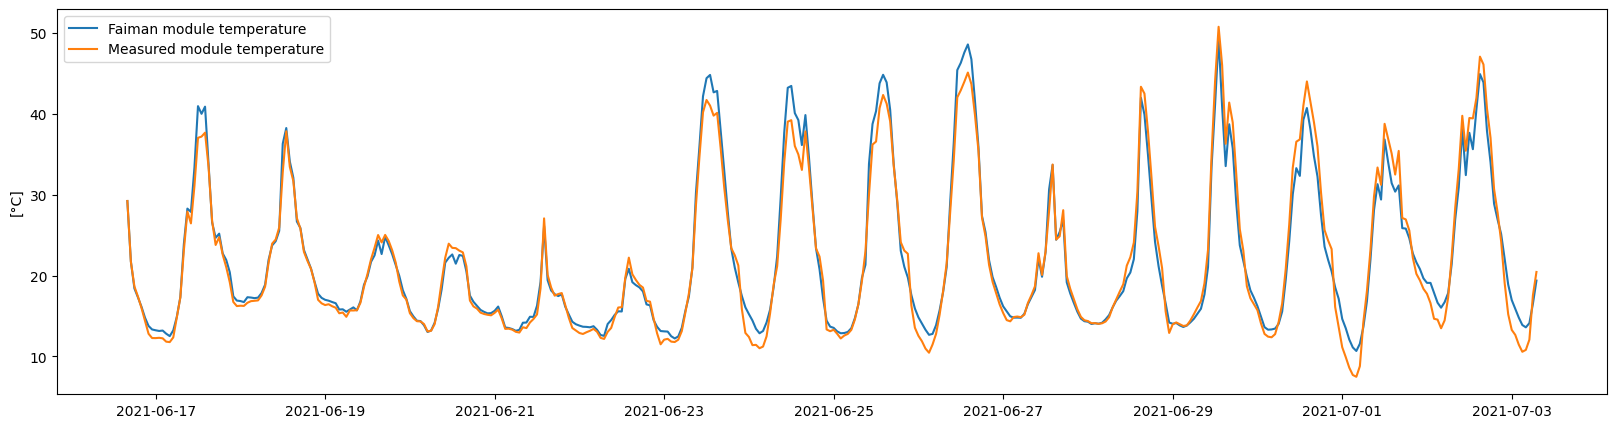

In [32]:
#Faiman Model
temp_faiman = temperature.faiman(df_hourly_avg["Irradiance (IRR Plan - Talesun) [W/m²]"], df_hourly_avg["WS500_1_Temperature [°C]"], df_hourly_avg["WS500_1_Wind speed [m/s]"])


a=4000
b=4400
plt.figure(figsize=(20,5))
plt.plot(temp_faiman[a:b], label="Faiman module temperature")
plt.plot(df_hourly_avg["PT Talesun FrLess 3 [°C]"][a:b], label="Measured module temperature")
plt.ylabel("[°C]")
plt.legend()
plt.show()

## Fuentes model

## 

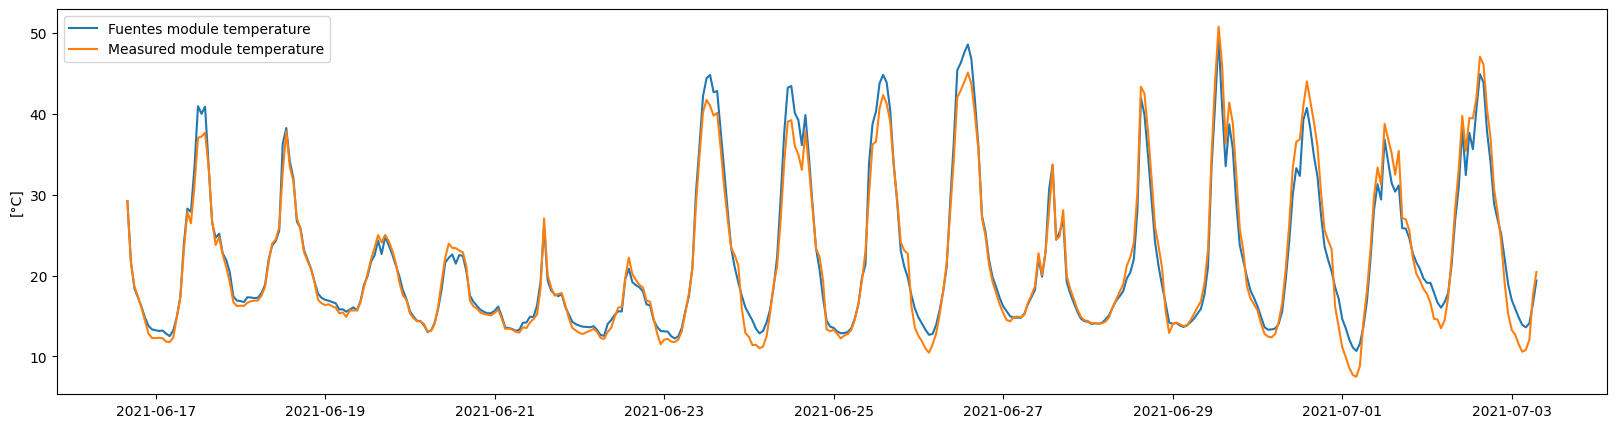

In [33]:
#Fuentes Model
temp_fuentes = temperature.fuentes(df_hourly_avg["Irradiance (IRR Plan - Talesun) [W/m²]"], df_hourly_avg["WS500_1_Temperature [°C]"], df_hourly_avg["WS500_1_Wind speed [m/s]"], 45, surface_tilt=45)


a=4000
b=4400
plt.figure(figsize=(20,5))
plt.plot(temp_faiman[a:b], label="Fuentes module temperature")
plt.plot(df_hourly_avg["PT Talesun FrLess 3 [°C]"][a:b], label="Measured module temperature")
plt.ylabel("[°C]")
plt.legend()
plt.show()